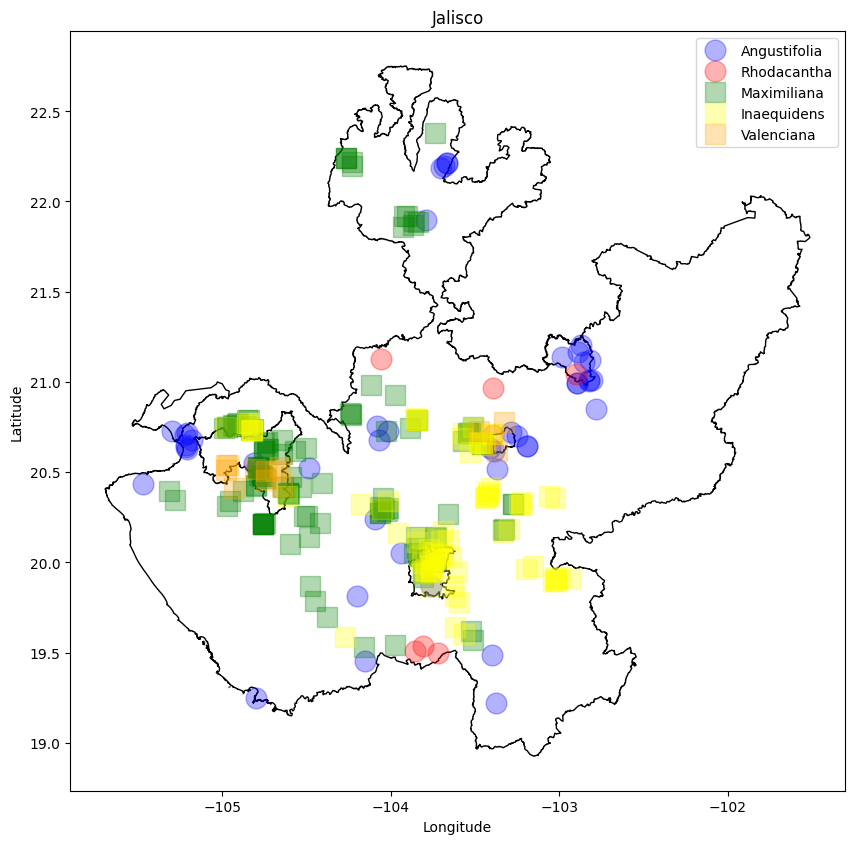

In [12]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# geographycal vector data
jalisco_shapefile_path = "data/14_jalisco/conjunto_de_datos/14ent.shp"
nayarit_shapefile_path = "data/18_nayarit/conjunto_de_datos/18mun.shp"
jalisco_mun_shapefile_path = "data/14_jalisco/conjunto_de_datos/14mun.shp"

# agave species observations data
jalisco_angustifolia_coordinates_path = "data/jalisco_angustifolia_observations.csv"
banderas_angustifolia_coordinates_path = "data/banderas_angustifolia_observations.csv"
rhodacantha_coordinates_path = "data/jalisco_rhodacantha_observations.csv"
maximiliana_coordinates_path = "data/jalisco_maximiliana_observations.csv"
inaequidens_coordinates_path = "data/jalisco_inaequidens_observations.csv"
valenciana_coordinates_path = "data/jalisco_valenciana_observations.csv"

# geoDataFrame creations
jalisco = gpd.read_file(jalisco_shapefile_path)
jalisco_mun = gpd.read_file(jalisco_mun_shapefile_path)
nayarit = gpd.read_file(nayarit_shapefile_path)

# geometric conversion
jalisco_geo = jalisco.to_crs("EPSG:4326")
jalisco_mun_geo = jalisco_mun.to_crs("EPSG:4326")
nayarit_geo = nayarit.to_crs("EPSG:4326")

# municipal data creation
banderas = nayarit_geo[nayarit['NOMGEO'] == 'Bahía de Banderas']
mascota = jalisco_mun_geo[jalisco_mun['NOMGEO'] == 'Mascota']
tapalpa = jalisco_mun_geo[jalisco_mun['NOMGEO'] == 'Tapalpa']
guadalajara = jalisco_mun_geo[jalisco_mun['NOMGEO'] == 'Guadalajara']
yahualica = jalisco_mun_geo[jalisco_mun['NOMGEO'] == 'Yahualica de González Gallo']

# agave DataFrames creation
jal_angustifolia_df = pd.read_csv(jalisco_angustifolia_coordinates_path)
banderas_angustifolia_df = pd.read_csv(banderas_angustifolia_coordinates_path)
rhodacantha_df = pd.read_csv(rhodacantha_coordinates_path)
maximiliana_df = pd.read_csv(maximiliana_coordinates_path)
inaequidens_df = pd.read_csv(inaequidens_coordinates_path)
valenciana_df = pd.read_csv(valenciana_coordinates_path)

# agave data filtering and lists creation
jal_angus_coordinates = list(zip(jal_angustifolia_df['longitude'], jal_angustifolia_df['latitude']))
banderas_angus_coordinates = list(zip(banderas_angustifolia_df['longitude'], banderas_angustifolia_df['latitude']))
rhoda_coordinates = list(zip(rhodacantha_df['longitude'], rhodacantha_df['latitude']))
maxim_coordinates = list(zip(maximiliana_df['longitude'], maximiliana_df['latitude']))
inaeq_coordinates = list(zip(inaequidens_df['longitude'], inaequidens_df['latitude']))
valen_coordinates = list(zip(valenciana_df['longitude'], valenciana_df['latitude']))

# agave Angustifolia geo points
# Jalisco observations
jal_angus_geometry = [Point(lon, lat) for lon, lat in jal_angus_coordinates]
jal_angus_points_gdf = gpd.GeoDataFrame(geometry=jal_angus_geometry, crs="EPSG:4326")
# Bahía de Banderas observations
banderas_angus_geometry = [Point(lon, lat) for lon, lat in banderas_angus_coordinates]
banderas_angus_points_gdf = gpd.GeoDataFrame(geometry=banderas_angus_geometry, crs="EPSG:4326")
# Angustifolia data merge
angus_points_gdf = pd.concat([jal_angus_points_gdf, banderas_angus_points_gdf], ignore_index=True)

# agave Rhodacantha geo points
rhoda_geometry = [Point(lon, lat) for lon, lat in rhoda_coordinates]
rhoda_points_gdf = gpd.GeoDataFrame(geometry=rhoda_geometry, crs="EPSG:4326")

# agave Maximiliana geo points
maxim_geometry = [Point(lon, lat) for lon, lat in maxim_coordinates]
maxim_points_gdf = gpd.GeoDataFrame(geometry=maxim_geometry, crs="EPSG:4326")

# agave Inaequidens geo points
inaeq_geometry = [Point(lon, lat) for lon, lat in inaeq_coordinates]
inaeq_points_gdf = gpd.GeoDataFrame(geometry=inaeq_geometry, crs="EPSG:4326")

# agave Valenciana geo points
valen_geometry = [Point(lon, lat) for lon, lat in valen_coordinates]
valen_points_gdf = gpd.GeoDataFrame(geometry=valen_geometry, crs="EPSG:4326")

fig, ax = plt.subplots(figsize=(10, 10))
jalisco_geo.plot(ax=ax, color='white', edgecolor='black')
banderas.plot(ax=ax, color='white', edgecolor='black')
mascota.plot(ax=ax, color='white', edgecolor='black')
tapalpa.plot(ax=ax, color='white', edgecolor='black')
guadalajara.plot(ax=ax, color='white', edgecolor='black')
yahualica.plot(ax=ax, color='white', edgecolor='black')

for point in angus_points_gdf.geometry:
    ax.plot(point.x, point.y, 'o', markersize=15, alpha=0.3, color='blue', label='Angustifolia')

for point in rhoda_points_gdf.geometry:
    ax.plot(point.x, point.y, 'o', markersize=15, alpha=0.3, color='red', label='Rhodacantha')

for point in maxim_points_gdf.geometry:
    ax.plot(point.x, point.y, 's', markersize=15, alpha=0.3, color='green', label='Maximiliana')

for point in inaeq_points_gdf.geometry:
    ax.plot(point.x, point.y, 's', markersize=15, alpha=0.3, color='yellow', label='Inaequidens')

for point in valen_points_gdf.geometry:
    ax.plot(point.x, point.y, 's', markersize=15, alpha=0.3, color='orange', label='Valenciana')

handles, labels = ax.get_legend_handles_labels()
unique_handles_labels = dict(zip(labels, handles))
ax.legend(unique_handles_labels.values(), unique_handles_labels.keys())

plt.title("Jalisco")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Frequencies plot

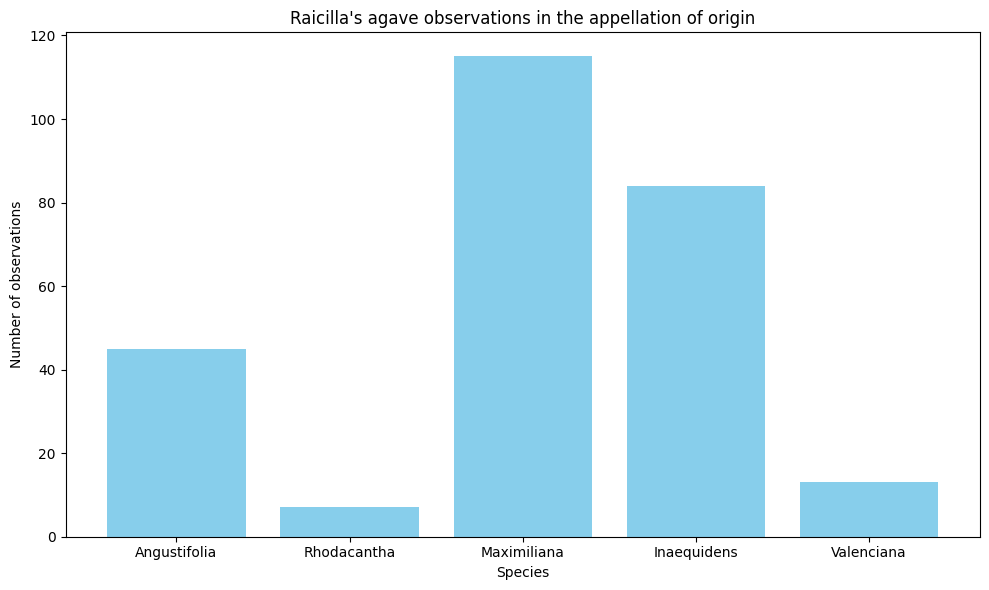

In [18]:
species_counts = {
    "Angustifolia": len(jal_angustifolia_df) + len(banderas_angustifolia_df),
    "Rhodacantha": len(rhodacantha_df),
    "Maximiliana": len(maximiliana_df),
    "Inaequidens": len(inaequidens_df),
    "Valenciana": len(valenciana_df),
}

# DataFrame of frequencies
species_counts_df = pd.DataFrame(
    list(species_counts.items()), columns=["Species", "Observations"]
)

# Plot bar
plt.figure(figsize=(10, 6))
plt.bar(species_counts_df["Species"], species_counts_df["Observations"], color="skyblue")
plt.xlabel("Species")
plt.ylabel("Number of observations")
plt.title("Raicilla's agave observations in the appellation of origin")
plt.tight_layout()
plt.show()